<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P7E7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

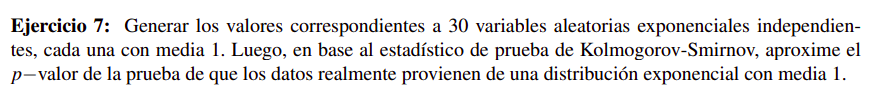

In [23]:
import numpy as np
from random import random, seed

MEDIA = 1
LAMBDA = 1/MEDIA
N_SIM = 100_000

def muestrear_exp():
    return -np.log(1-random())/LAMBDA

TAMANO_MUESTRA_EMPIRICA = 30
MUESTRA_EMPIRICA = [muestrear_exp() for _ in range(TAMANO_MUESTRA_EMPIRICA)]

In [24]:
def fda_exp(x):
    return 1 - np.exp(-LAMBDA*x)

def estadistico_KS(muestra, fda):
    muestra_ordenada = sorted(muestra)
    D_max = abs(fda(muestra_ordenada[0]) - (1 / TAMANO_MUESTRA_EMPIRICA))

    for j, y in enumerate(muestra_ordenada, start=1):
        F_y = fda(y)
        D_plus = j / TAMANO_MUESTRA_EMPIRICA - F_y
        D_minus = F_y - (j - 1) / TAMANO_MUESTRA_EMPIRICA
        D_max = max(D_max, D_plus, D_minus)

    return D_max

d_exp_empirico = estadistico_KS(MUESTRA_EMPIRICA, fda_exp)
print(f"estadistico d usando exp: {d_exp_empirico}")

estadistico d usando exp: 0.08647216356226672


In [26]:
d_empirico = estadistico_KS(MUESTRA_EMPIRICA, fda_exp)

# Estimación de p-valor por simulación
def estimar_Pvalor_KS_conExp(n_sim=N_SIM):
    cuenta = 0
    for _ in range(n_sim):
        muestra_simulada = [muestrear_exp() for _ in range(TAMANO_MUESTRA_EMPIRICA)]
        d_simulado = estadistico_KS(muestra_simulada, fda_exp)
        if d_simulado >= d_empirico:
            cuenta += 1
    return cuenta / n_sim

seed(1)
p_valor_estimado = estimar_Pvalor_KS_conExp()
print(f"P-valor estimado usando exponencial: {p_valor_estimado:.4f}")


P-valor estimado usando exponencial: 0.9635


In [29]:
# chequeo
from scipy.stats import expon, kstest

# Parámetros
n = 30
media = 1

# Paso 1: Generar muestra exponencial
muestra = MUESTRA_EMPIRICA #np.random.exponential(scale=media, size=n)

# Paso 2: Prueba de Kolmogorov-Smirnov
# La exponencial con media 1 tiene lambda=1, que es la exponencial estándar
resultado = kstest(muestra, cdf='expon')

print(f"Estadístico D: {resultado.statistic:.4f}")
print(f"p-valor: {resultado.pvalue:.4f}")

Estadístico D: 0.0865
p-valor: 0.9640
